In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.utils import make_grid
from torch.utils.data import random_split
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/CROP_WEED'
print('Types/Class of Plants in the data-set :')
os.listdir(dataset_path+'/train')

Types/Class of Plants in the data-set :


['Crop', 'Weed']

In [ ]:
Crop_train_files = os.listdir(dataset_path+'/train'+"/Crop")
Crop_valid_files = os.listdir(dataset_path+'/validation'+"/Crop")
print('\nNo. of training set samples for Crop pictures  : ', len(Crop_train_files))
print('No. of validation set samples for Crop pictures  : ', len(Crop_valid_files))
print(Crop_train_files[:10])

Weed_train_files = os.listdir(dataset_path+'/train'+"/Weed")
Weed_valid_files = os.listdir(dataset_path+'/validation'+"/Weed")
print('\nNo. of training set samples for Weed : ', len(Weed_train_files))
print('No. of validation set samples for Weed : ', len(Weed_valid_files))
print(Weed_train_files[:10])



No. of training set samples for Crop pictures  :  483
No. of validation set samples for Crop pictures  :  223
['agri_0_3944.jpeg', 'agri_0_3983.jpeg', 'agri_0_3971.jpeg', 'agri_0_4033.jpeg', 'agri_0_4209.jpeg', 'agri_0_3995.jpeg', 'agri_0_4113.jpeg', 'agri_0_4116.jpeg', 'agri_0_4216.jpeg', 'agri_0_4237.jpeg']

No. of training set samples for Weed :  531
No. of validation set samples for Weed :  229
['agri_0_3607.jpeg', 'agri_0_2895.jpeg', 'agri_0_3682.jpeg', 'agri_0_3856.jpeg', 'agri_0_3054.jpeg', 'agri_0_3282.jpeg', 'agri_0_3143.jpeg', 'agri_0_3423.jpeg', 'agri_0_3858.jpeg', 'agri_0_2971.jpeg']


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
train_dataset =ImageFolder(dataset_path+'/train', transform=ToTensor())
validation_dataset = ImageFolder(dataset_path+'/validation', transform=ToTensor())
test_dataset = ImageFolder(dataset_path+'/test', transform=ToTensor())

In [ ]:
Classes = train_dataset.classes
# Number of Images for each class
for i in Classes:
  train_images = os.listdir(dataset_path+'/train/' + i)
  img_count = len(train_images)
  print("{} images belongs to {}".format(img_count,i))

483 images belongs to Crop
531 images belongs to Weed


In [ ]:
print("Total number of classes in the train dataset : ",len(train_dataset.classes))

Total number of classes in the train dataset :  2


In [ ]:
print("Training set size: ",len(train_dataset))
print("Validation set size: ",len(validation_dataset))

Training set size:  1014
Validation set size:  452


In [ ]:
img, label = train_dataset[0]
print(img.shape, label)
img

torch.Size([3, 512, 512]) 0


tensor([[[0.3176, 0.3451, 0.3490,  ..., 0.8784, 0.8863, 0.8824],
         [0.5098, 0.5176, 0.5098,  ..., 0.7490, 0.7294, 0.7098],
         [0.5176, 0.5216, 0.5294,  ..., 0.8824, 0.9059, 0.9020],
         ...,
         [0.1137, 0.1137, 0.0784,  ..., 0.5020, 0.4980, 0.5059],
         [0.1569, 0.1765, 0.1647,  ..., 0.1490, 0.1961, 0.2157],
         [0.2745, 0.3020, 0.2941,  ..., 0.1412, 0.1647, 0.1098]],

        [[0.2549, 0.2824, 0.2863,  ..., 0.8118, 0.8196, 0.8157],
         [0.4471, 0.4549, 0.4471,  ..., 0.6824, 0.6627, 0.6431],
         [0.4549, 0.4588, 0.4667,  ..., 0.8078, 0.8314, 0.8275],
         ...,
         [0.0431, 0.0431, 0.0196,  ..., 0.4392, 0.4353, 0.4431],
         [0.0863, 0.1059, 0.1020,  ..., 0.0863, 0.1294, 0.1490],
         [0.2000, 0.2275, 0.2314,  ..., 0.0745, 0.0980, 0.0431]],

        [[0.1922, 0.2196, 0.2235,  ..., 0.7020, 0.7020, 0.6980],
         [0.3843, 0.3922, 0.3843,  ..., 0.5725, 0.5451, 0.5255],
         [0.3922, 0.3961, 0.4039,  ..., 0.6902, 0.7137, 0.

### ***Visualising Data***

---



In [ ]:
def show_sample(img, label):
    print('Label: ', train_dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2,0))

Label:  Crop (0)


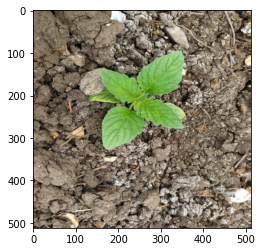

In [ ]:
show_sample(*train_dataset[0])

Label:  Crop (0)


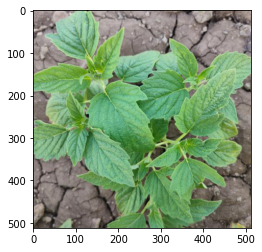

In [ ]:
show_sample(*train_dataset[104])

Label:  Weed (1)


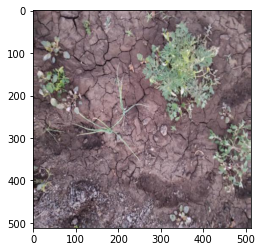

In [ ]:
show_sample(*train_dataset[604])

Label:  Weed (1)


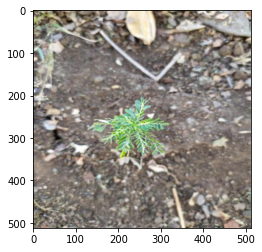

In [ ]:
show_sample(*train_dataset[1005])

Label:  Weed (1)


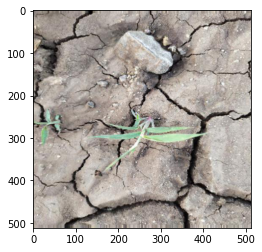

In [ ]:
show_sample(*train_dataset[1002])

### **Normalization & Data augmentation :**

---



In [ ]:
import torchvision.transforms as transforms
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_transforms = transforms.Compose([
                         transforms.Resize([32,32]),
                         transforms.RandomCrop(32, padding=2, padding_mode='reflect'),
                         transforms.RandomHorizontalFlip(),
                         transforms.ToTensor(),
                         transforms.Normalize(*stats,inplace=True)])
validation_transforms = transforms.Compose(
    [transforms.Resize([32,32]),
    transforms.ToTensor(), transforms.Normalize(*stats)])

In [ ]:
train_ds = ImageFolder(dataset_path+'/train', train_transforms)
valid_ds = ImageFolder(dataset_path+'/validation', validation_transforms)
batch_size = 32

train_dl = torch.utils.data.DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Random batch of images from the dataset :



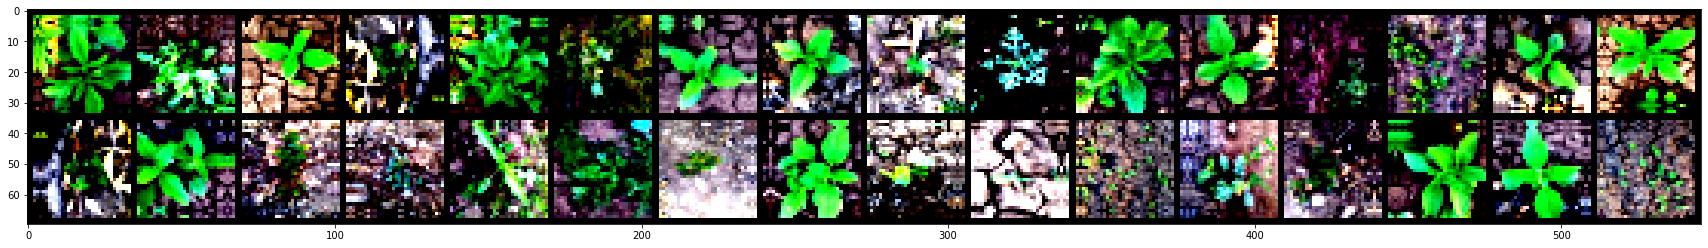

In [ ]:
def show_batch(dl):
  for images, labels in dl:
        fig, ax = plt.subplots(figsize=(30,15))
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break
print("Random batch of images from the dataset :\n")
show_batch(train_dl)

In [ ]:
img, label = train_ds[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[ 0.0716, -0.2192,  0.0716,  ...,  0.0328,  0.0716,  0.0910],
         [-0.1610,  0.0716, -0.5293,  ...,  0.0134, -0.2192, -0.0060],
         [ 0.1297,  0.5756, -0.1223,  ...,  0.0910, -0.1804, -0.3161],
         ...,
         [ 0.4787,  0.4787, -0.0060,  ..., -0.1610, -0.0641, -0.3355],
         [ 0.5562,  0.5174,  0.1685,  ..., -0.4324, -0.1804, -0.5875],
         [ 0.8082,  0.3624,  0.5174,  ..., -0.6844, -0.2773, -0.1223]],

        [[-0.1566, -0.4122, -0.1369,  ..., -0.1762, -0.1762, -0.1566],
         [-0.3336, -0.1172, -0.7662,  ..., -0.2156, -0.4319, -0.2156],
         [-0.0779,  0.3548, -0.3532,  ..., -0.1566, -0.4122, -0.5106],
         ...,
         [ 0.2368,  0.2761, -0.2156,  ..., -0.3926, -0.3139, -0.5499],
         [ 0.3548,  0.3351, -0.0386,  ..., -0.6482, -0.3729, -0.7859],
         [ 0.6301,  0.1778,  0.3351,  ..., -0.9039, -0.4909, -0.3336]],

        [[-0.2704, -0.5435, -0.3094,  ..., -0.3484, -0.3874, -0.3484],
         [-0.4460, -0.2899, -0.8752,  ..., -0

### **Using a GPU**

---



In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'Test_loss': loss.detach(), 'Test_accuracy': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['Test_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['Test_accuracy'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'Test_loss': epoch_loss.item(), 'Test_accuracy': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], Train_loss: {:.4f}, Test_loss: {:.4f}, Test_accuracy: {:.4f}".format(
            epoch, result['Train_loss'], result['Test_loss'], result['Test_accuracy']))

In [ ]:
class CNN_model(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential (
            #First chain of 2 Layers
            nn.Conv2d(3, 32, kernel_size=3, stride =1, padding=1),
            # Output size after convolution filter = [(W-F+2P)/S +1] = [(32 - 3+2)/1 + 1] = 32
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            #Second block /chain of 2 Layers
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

           #Third block /chain of 2 Layers
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
           # Total 6 convolutional layers have been applied

            nn.Flatten(), # It takes the output feature map and flattens it out into a vector,
            nn.Linear (256* 4 * 4, 1024),
            # we get 1024 outputs
            nn.ReLU(),
            nn.Linear(1024, 512),
            # from 1024 inputs we get 512 outputs
             nn.ReLU(),
            # from 512 inputs we finally get 23 outputs( no. of classes in the dataset)
             nn.Linear(512, 2)
            )

          # Therfore we have 6 Convolutional layers and 3 linear layers
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = CNN_model()
model

CNN_model(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1

### **Training the Model**

---



In [ ]:
@torch.no_grad()
def evaluate(model, test_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_loader]
    return model. validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, test_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, test_loader)
        result['Train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(CNN_model(), device)

In [ ]:
num_epochs = 15
opt_func = torch.optim.Adam
lr = 0.001

In [ ]:
history = fit(num_epochs, lr, model, train_dl, valid_dl, opt_func)

Epoch [0], Train_loss: 0.6922, Test_loss: 0.6900, Test_accuracy: 0.5645
Epoch [1], Train_loss: 0.6935, Test_loss: 0.6897, Test_accuracy: 0.5645
Epoch [2], Train_loss: 0.5650, Test_loss: 0.5495, Test_accuracy: 0.7207
Epoch [3], Train_loss: 0.3200, Test_loss: 0.3437, Test_accuracy: 0.8691
Epoch [4], Train_loss: 0.3078, Test_loss: 0.2972, Test_accuracy: 0.8672
Epoch [5], Train_loss: 0.2501, Test_loss: 0.2187, Test_accuracy: 0.9434
Epoch [6], Train_loss: 0.2509, Test_loss: 0.2421, Test_accuracy: 0.9180
Epoch [7], Train_loss: 0.2366, Test_loss: 0.2189, Test_accuracy: 0.9453
Epoch [8], Train_loss: 0.2474, Test_loss: 0.2292, Test_accuracy: 0.9043
Epoch [9], Train_loss: 0.2123, Test_loss: 0.1933, Test_accuracy: 0.9590
Epoch [10], Train_loss: 0.2017, Test_loss: 0.2089, Test_accuracy: 0.9512
Epoch [11], Train_loss: 0.2364, Test_loss: 0.1756, Test_accuracy: 0.9609
Epoch [12], Train_loss: 0.2344, Test_loss: 0.3086, Test_accuracy: 0.8398
Epoch [13], Train_loss: 0.2150, Test_loss: 0.1755, Test_accur

In [ ]:
def plot_accuracies(history):
    accuracies = [x['Test_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

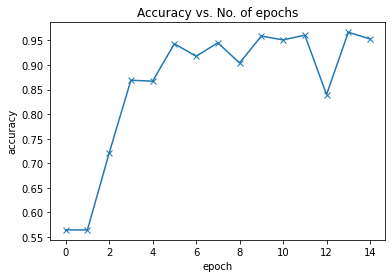

In [ ]:
plot_accuracies(history)



---
### **Observation :**
---

***Our model reaches a max accuracy of around 96.29% upto 10th Epoch***

---



### **Plot of training and validation losses to study the trend**

---



In [ ]:
def plot_losses(history):
    train_losses = [x.get('Train_loss') for x in history]
    val_losses = [x['Test_loss'] for x in history]
    plt.plot(train_losses, '-b.')
    plt.plot(val_losses, '-r.')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Testing'])
    plt.title('Loss vs. No. of epochs');

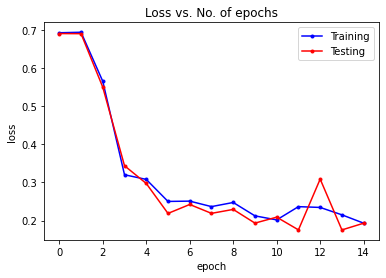

In [ ]:
plot_losses(history)


### **Testing with individual images**

---



In [ ]:
test_transforms = transforms.Compose(
    [transforms.Resize([32,32]),
    transforms.ToTensor(), transforms.Normalize(*stats)])
test_ds = ImageFolder(dataset_path+'/test', test_transforms)
test_dl = torch.utils.data.DataLoader(test_ds)

In [ ]:
print("Size of Unseen images set : ",len(test_ds))

Size of Unseen images set :  10


In [ ]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return train_ds.classes[preds[0].item()]

Label: Crop , Predicted: Crop


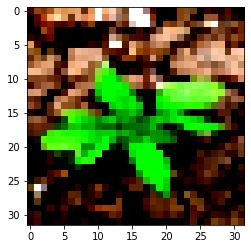

In [ ]:
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Crop , Predicted: Weed


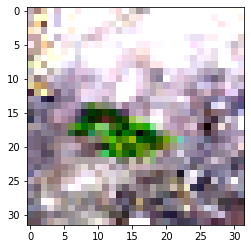

In [ ]:
img, label = test_ds[1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Crop , Predicted: Weed


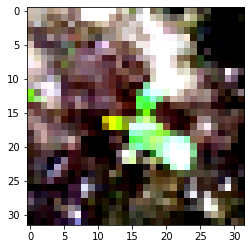

In [ ]:
img, label = test_ds[2]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Crop , Predicted: Crop


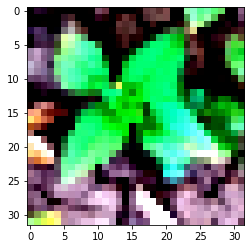

In [ ]:
img, label = test_ds[3]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Crop , Predicted: Crop


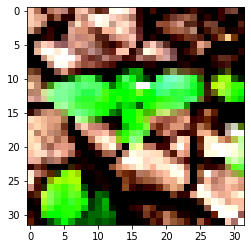

In [ ]:
img, label = test_ds[4]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Weed , Predicted: Weed


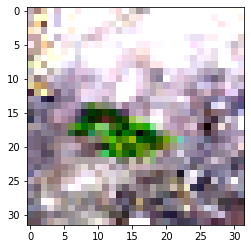

In [ ]:
img, label = test_ds[5]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Weed , Predicted: Crop


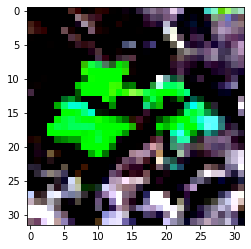

In [ ]:
img, label = test_ds[6]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Weed , Predicted: Weed


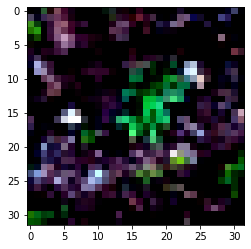

In [ ]:
img, label = test_ds[7]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Weed , Predicted: Weed


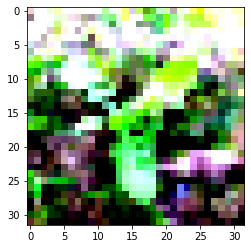

In [ ]:
img, label = test_ds[8]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Weed , Predicted: Weed


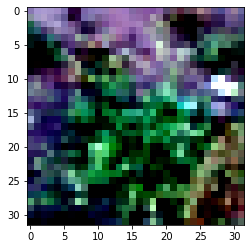

In [ ]:
img, label = test_ds[9]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))